### N-BEATS 
* N-BEATS is a state-of-the-art model that shows the potential of pure DL architectures in the context of the time-series forecasting. It outperforms well-established statistical approaches on the M3, and M4 competitions. For more details on the model, see: https://arxiv.org/pdf/1905.10437.pdf.

In [1]:
import pickle
with open('../data/crypto_currency.pickle', 'rb') as f:
    data = pickle.load(f)
    
BTC = data['KRW-BTC']
# ETH = data['KRW-BTC'][['candle_date_time_kst', 'trade_price']]

In [42]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import NBEATSModel
from darts.metrics import mape, r2_score
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression
import warnings
warnings.filterwarnings('ignore')
import logging

logging.disable(logging.CRITICAL)

In [3]:
num_samples = 200
figsize = (9, 6)

In [4]:
cols = ['candle_date_time_kst', 'opening_price', 'high_price', 'low_price', 
        'trade_price', 'candle_acc_trade_price', 'candle_acc_trade_volume', 
        'prev_closing_price', 'change_price', 'change_rate', 'MA5', 'MA20', 'MA60']
coin = data['KRW-BTC']
coin.set_index(pd.to_datetime(coin['candle_date_time_kst']), inplace = True)
coin = coin.drop(columns = ['candle_date_time_kst'])
coin = coin[~coin.index.duplicated(keep = 'first')]
series = TimeSeries.from_dataframe(coin,  value_cols = 'trade_price', fill_missing_dates=True, freq=None)

In [5]:
# Create training and validation sets:
training_cutoff = pd.Timestamp("20220101")
train, val = series.split_after(training_cutoff)

In [9]:
# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

### N-BEATS: generic architecture

In [11]:
input_chunk_length = 24
output_chunk_length=7

my_model = NBEATSModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=output_chunk_length,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_BTC",
)

In [12]:
my_model.fit(
    train_transformed, 
    val_series = val_transformed,
    verbose=True
)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [55]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        f'''R2: {r2_score(ts_transformed.univariate_component(0), pred_series)} \n
         mape: {mape(ts_transformed.univariate_component(0), pred_series)}'''
    )
    plt.legend()

  0%|          | 0/19 [00:00<?, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

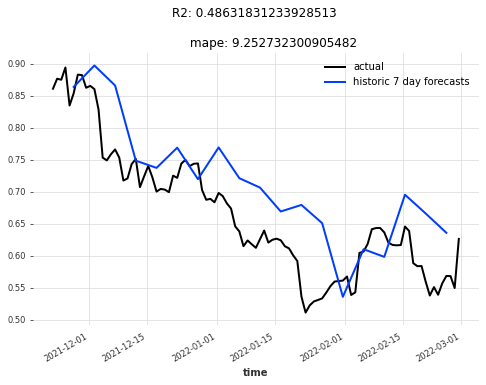

In [56]:
pred_series = my_model.historical_forecasts(
    series_transformed,
    start=series_transformed._time_index[-100],
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)
display_forecast(pred_series, series_transformed, "7 day", start_date=series_transformed._time_index[-100])

In [57]:
interpretable_model = NBEATSModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=output_chunk_length,
    generic_architecture=False,
    num_blocks=3,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_interpretable_BTC",
)

In [58]:
interpretable_model.fit(series=train_transformed, val_series=val_transformed, verbose=True)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

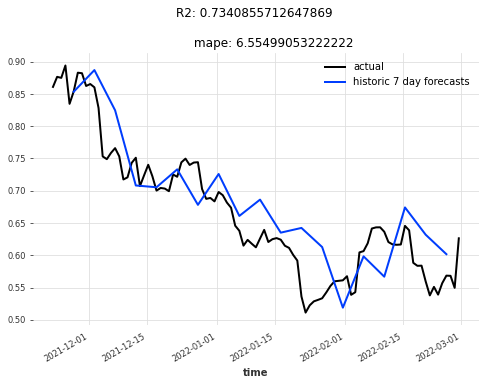

In [59]:
pred_series = interpretable_model.historical_forecasts(
    series_transformed,
    start=series_transformed._time_index[-100],
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)
display_forecast(pred_series, series_transformed, "7 day", start_date=series_transformed._time_index[-100])

past_covariates are series not necessarily known ahead of the forecast time. Those can for instance represent things that have to be measured and are not known upfront. Models do not use the future values of past_covariates when making forecasts.

future_covariates are series which are known in advance, up to the forecast horizon. This can represent things such as calendar information, holidays, weather forecasts, etc. Models that accept future_covariates will look at the future values (up to the forecast horizon) when making forecasts.

Text(0.5, 1.0, 'one multivariate time series of 2 dimensions, containing covariates for the air series')

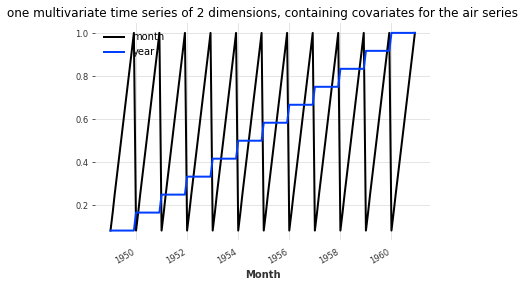

In [16]:
from darts import concatenate
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dt_attr

air_covs = concatenate(
    [
        dt_attr(series_air.time_index, 'month', dtype = np.float32) / 12,
        (dt_attr(series_air.time_index, 'year', dtype = np.float32) - 1948) / 12,
    ],
    axis = 'component',
)

milk_covs = concatenate(
    [
        dt_attr(series_milk.time_index, 'month', dtype = np.float32) / 12,
        (dt_attr(series_milk.time_index, 'year', dtype = np.float32) - 1948) / 12,
    ],
    axis = 'component',
)

air_covs.plot()
plt.title('one multivariate time series of 2 dimensions, containing covariates for the air series')

In [17]:
model = NBEATSModel(input_chunk_length = 24, output_chunk_length = 12, random_state = 42)
model.fit(
    [train_air_scaled, train_milk_scaled],
    past_covariates = [air_covs, milk_covs],
    epochs = 50,
    verbose = True,
)

[2022-05-05 16:13:34,239] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2022-05-05 16:13:34,239] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
2022-05-05 16:13:34 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 194 samples.
[2022-05-05 16:13:34,357] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-05-05 16:13:34,357] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
2022-05-05 16:13:34 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
[2022-05-05 16:13:34,360] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightnin

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

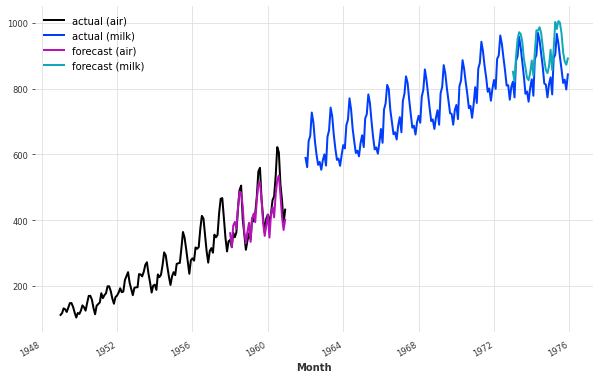

In [18]:
pred_air = model.predict(series=train_air_scaled, past_covariates=air_covs, n=36)
pred_milk = model.predict(series=train_milk_scaled, past_covariates=milk_covs, n=36)

# scale back:
pred_air, pred_milk = scaler.inverse_transform([pred_air, pred_milk])

plt.figure(figsize=(10, 6))
series_air.plot(label="actual (air)")
series_milk.plot(label="actual (milk)")
pred_air.plot(label="forecast (air)")
pred_milk.plot(label="forecast (milk)")

In [20]:
encoders = {
    "cyclic": {"future": ["month"]},
    "datetime_attribute": {"future": ["hour", "dayofweek"]},
    "position": {"past": ["absolute"], "future": ["relative"]},
    "custom": {"past": [lambda idx: (idx.year - 1950) / 50]},
    "transformer": Scaler(),
}

In [21]:
model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    add_encoders=encoders,
    random_state=42,
)

In [23]:
model.fit([train_air_scaled, train_milk_scaled], epochs = 50, verbose = True)

[2022-05-05 16:21:38,824] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:21:38 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:21:38,899] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2022-05-05 16:21:38,899] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
2022-05-05 16:21:38 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 194 samples.
[2022-05-05 16:21:39,008] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-05-05 16:21:39,008] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 3

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

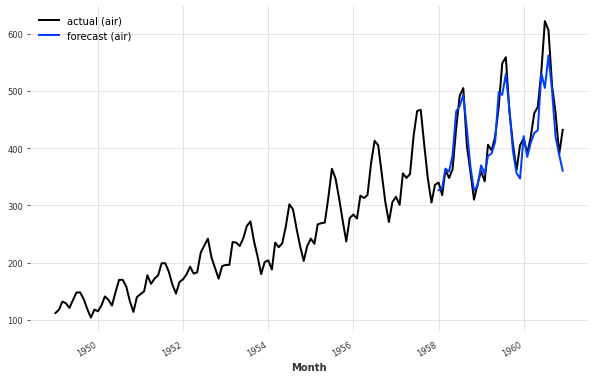

In [24]:
pred_air = model.predict(series=train_air_scaled, n=36)

# scale back:
pred_air = scaler.inverse_transform(pred_air)

plt.figure(figsize=(10, 6))
series_air.plot(label="actual (air)")
pred_air.plot(label="forecast (air)")

In [ ]:
from darts.utils.statistics import plot_residuals_analysis
plot_residuals_analysis(model.residuals(train_air_scaled))

[2022-05-05 16:23:35,916] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:23:35 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:23:35,941] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1 samples.
[2022-05-05 16:23:35,941] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1 samples.
2022-05-05 16:23:35 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1 samples.
2022-05-05 16:23:35 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:23:35 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:23:35 pytorch_lightning.utilities.rank_z

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:23:47,615] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:23:47 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:23:47,635] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 2 samples.
[2022-05-05 16:23:47,635] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 2 samples.
2022-05-05 16:23:47 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 2 samples.
2022-05-05 16:23:47 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:23:47 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:23:47 pytorch_lightning.utilities.rank_z

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:23:59,692] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:23:59 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:23:59,713] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 3 samples.
[2022-05-05 16:23:59,713] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 3 samples.
2022-05-05 16:23:59 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 3 samples.
2022-05-05 16:23:59 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:23:59 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:23:59 pytorch_lightning.utilities.rank_z

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:24:11,757] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:24:11 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:24:11,776] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 4 samples.
[2022-05-05 16:24:11,776] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 4 samples.
2022-05-05 16:24:11 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 4 samples.
2022-05-05 16:24:11 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:24:11 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:24:11 pytorch_lightning.utilities.rank_z

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:24:23,873] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:24:23 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:24:23,892] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5 samples.
[2022-05-05 16:24:23,892] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5 samples.
2022-05-05 16:24:23 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 5 samples.
2022-05-05 16:24:23 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:24:23 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:24:23 pytorch_lightning.utilities.rank_z

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:24:36,066] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:24:36 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:24:36,086] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 6 samples.
[2022-05-05 16:24:36,086] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 6 samples.
2022-05-05 16:24:36 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 6 samples.
2022-05-05 16:24:36 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:24:36 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:24:36 pytorch_lightning.utilities.rank_z

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:24:48,198] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:24:48 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:24:48,217] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 7 samples.
[2022-05-05 16:24:48,217] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 7 samples.
2022-05-05 16:24:48 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 7 samples.
2022-05-05 16:24:48 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:24:48 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:24:48 pytorch_lightning.utilities.rank_z

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:25:03,530] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:25:03 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:25:03,550] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 8 samples.
[2022-05-05 16:25:03,550] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 8 samples.
2022-05-05 16:25:03 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 8 samples.
2022-05-05 16:25:03 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:25:03 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:25:03 pytorch_lightning.utilities.rank_z

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:25:15,872] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:25:15 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:25:15,892] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 9 samples.
[2022-05-05 16:25:15,892] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 9 samples.
2022-05-05 16:25:15 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 9 samples.
2022-05-05 16:25:15 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:25:15 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:25:15 pytorch_lightning.utilities.rank_z

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:25:28,377] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:25:28 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:25:28,397] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 10 samples.
[2022-05-05 16:25:28,397] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 10 samples.
2022-05-05 16:25:28 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 10 samples.
2022-05-05 16:25:28 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:25:28 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:25:28 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:25:40,871] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:25:40 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:25:40,891] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 11 samples.
[2022-05-05 16:25:40,891] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 11 samples.
2022-05-05 16:25:40 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 11 samples.
2022-05-05 16:25:40 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:25:40 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:25:40 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:25:53,427] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:25:53 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:25:53,448] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 12 samples.
[2022-05-05 16:25:53,448] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 12 samples.
2022-05-05 16:25:53 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 12 samples.
2022-05-05 16:25:53 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:25:53 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:25:53 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:26:05,937] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:26:05 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:26:05,958] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 13 samples.
[2022-05-05 16:26:05,958] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 13 samples.
2022-05-05 16:26:05 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 13 samples.
2022-05-05 16:26:05 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:26:05 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:26:05 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:26:18,497] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:26:18 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:26:18,517] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 14 samples.
[2022-05-05 16:26:18,517] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 14 samples.
2022-05-05 16:26:18 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 14 samples.
2022-05-05 16:26:18 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:26:18 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:26:18 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:26:31,296] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:26:31 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:26:31,317] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 15 samples.
[2022-05-05 16:26:31,317] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 15 samples.
2022-05-05 16:26:31 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 15 samples.
2022-05-05 16:26:31 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:26:31 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:26:31 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:26:44,084] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:26:44 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:26:44,105] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 16 samples.
[2022-05-05 16:26:44,105] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 16 samples.
2022-05-05 16:26:44 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 16 samples.
2022-05-05 16:26:44 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:26:44 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:26:44 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:26:57,070] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:26:57 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:26:57,091] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 17 samples.
[2022-05-05 16:26:57,091] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 17 samples.
2022-05-05 16:26:57 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 17 samples.
2022-05-05 16:26:57 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:26:57 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:26:57 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:27:09,967] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:27:09 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:27:09,989] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 18 samples.
[2022-05-05 16:27:09,989] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 18 samples.
2022-05-05 16:27:09 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 18 samples.
2022-05-05 16:27:09 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:27:09 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:27:09 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:27:22,908] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:27:22 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:27:22,935] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 19 samples.
[2022-05-05 16:27:22,935] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 19 samples.
2022-05-05 16:27:22 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 19 samples.
2022-05-05 16:27:22 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:27:22 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:27:22 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:27:35,827] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:27:35 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:27:35,848] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 20 samples.
[2022-05-05 16:27:35,848] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 20 samples.
2022-05-05 16:27:35 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 20 samples.
2022-05-05 16:27:35 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:27:35 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:27:35 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:27:48,834] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:27:48 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:27:48,856] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 21 samples.
[2022-05-05 16:27:48,856] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 21 samples.
2022-05-05 16:27:48 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 21 samples.
2022-05-05 16:27:48 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:27:48 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:27:48 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:28:02,053] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:28:02 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:28:02,074] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 22 samples.
[2022-05-05 16:28:02,074] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 22 samples.
2022-05-05 16:28:02 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 22 samples.
2022-05-05 16:28:02 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:28:02 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:28:02 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:28:15,245] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:28:15 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:28:15,266] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 23 samples.
[2022-05-05 16:28:15,266] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 23 samples.
2022-05-05 16:28:15 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 23 samples.
2022-05-05 16:28:15 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:28:15 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:28:15 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:28:28,326] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:28:28 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:28:28,347] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 24 samples.
[2022-05-05 16:28:28,347] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 24 samples.
2022-05-05 16:28:28 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 24 samples.
2022-05-05 16:28:28 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:28:28 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:28:28 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:28:41,466] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:28:41 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:28:41,488] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 25 samples.
[2022-05-05 16:28:41,488] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 25 samples.
2022-05-05 16:28:41 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 25 samples.
2022-05-05 16:28:41 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:28:41 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:28:41 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:28:54,654] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:28:54 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:28:54,675] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 26 samples.
[2022-05-05 16:28:54,675] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 26 samples.
2022-05-05 16:28:54 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 26 samples.
2022-05-05 16:28:54 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:28:54 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:28:54 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:29:07,839] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:29:07 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:29:07,861] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 27 samples.
[2022-05-05 16:29:07,861] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 27 samples.
2022-05-05 16:29:07 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 27 samples.
2022-05-05 16:29:07 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:29:07 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:29:07 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:29:21,050] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:29:21 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:29:21,072] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 28 samples.
[2022-05-05 16:29:21,072] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 28 samples.
2022-05-05 16:29:21 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 28 samples.
2022-05-05 16:29:21 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:29:21 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:29:21 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:29:34,497] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:29:34 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:29:34,520] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 29 samples.
[2022-05-05 16:29:34,520] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 29 samples.
2022-05-05 16:29:34 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 29 samples.
2022-05-05 16:29:34 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:29:34 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:29:34 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:29:47,784] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:29:47 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:29:47,806] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 30 samples.
[2022-05-05 16:29:47,806] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 30 samples.
2022-05-05 16:29:47 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 30 samples.
2022-05-05 16:29:47 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:29:47 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:29:47 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:30:01,183] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:30:01 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:30:01,205] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 31 samples.
[2022-05-05 16:30:01,205] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 31 samples.
2022-05-05 16:30:01 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 31 samples.
2022-05-05 16:30:01 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:30:01 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:30:01 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:30:14,624] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:30:14 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:30:14,647] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 32 samples.
[2022-05-05 16:30:14,647] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 32 samples.
2022-05-05 16:30:14 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 32 samples.
2022-05-05 16:30:14 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:30:14 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:30:14 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 1it [00:00, ?it/s]

[2022-05-05 16:30:28,055] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:30:28 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:30:28,078] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 33 samples.
[2022-05-05 16:30:28,078] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 33 samples.
2022-05-05 16:30:28 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 33 samples.
2022-05-05 16:30:28 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:30:28 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:30:28 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

[2022-05-05 16:30:53,295] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:30:53 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:30:53,317] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 34 samples.
[2022-05-05 16:30:53,317] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 34 samples.
2022-05-05 16:30:53 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 34 samples.
2022-05-05 16:30:53 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:30:53 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:30:53 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

[2022-05-05 16:31:18,676] WARNING | darts.utils.data.encoders | Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
2022-05-05 16:31:18 darts.utils.data.encoders WARNING: Specified future encoders in `add_encoders` at model creation but model does not accept future covariates. future encoders will be ignored.
[2022-05-05 16:31:18,699] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 35 samples.
[2022-05-05 16:31:18,699] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 35 samples.
2022-05-05 16:31:18 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 35 samples.
2022-05-05 16:31:18 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-05 16:31:18 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-05 16:31:18 pytorch_lightning.utilities.ran

Training: 0it [00:00, ?it/s]